In [1322]:
from itertools import chain
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [1323]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

## Probability Density Function for a Normal Distribution

In [1324]:
def pdf_normal(x, axis=0):
    mean, std = np.mean(np.array(x), axis=axis), np.std(np.array(x), axis=axis)
    return lambda x: np.exp(-0.5*((x - mean)/std)**2)/(std*np.sqrt(2*np.pi)) 

## Numeric Integrator

In [1325]:
def euler(x0=0, dt=0, dy=0, steps=-1, thr=1e-3):
    steps = int(thr/dt) if steps < 1 else steps
    value = np.zeros_like(x0)
    step = 0
    for step in range(steps):
        x0 = x0 + dt
        value = value + dt*dy(x0)
        try:
           if np.allclose(sum(value), 1, 0.0001):
               return value, step
        except TypeError: # When we pass floats instead of iterables
            pass
    
    return value, step

## Class Conditional Probability Function
A vectorized function, that computes the PDF (Probability Density) and integrates the PDF over an interval $x_i + \Delta_x$ to approximate the conditonal probability $P(x_i | w_j)$

In [1330]:
def prob_dist(feature, thr=1e-3):
    return lambda x: euler(x0=x, dy=pdf_normal(feature), dt=1e-5, thr=thr)[0]

## Example

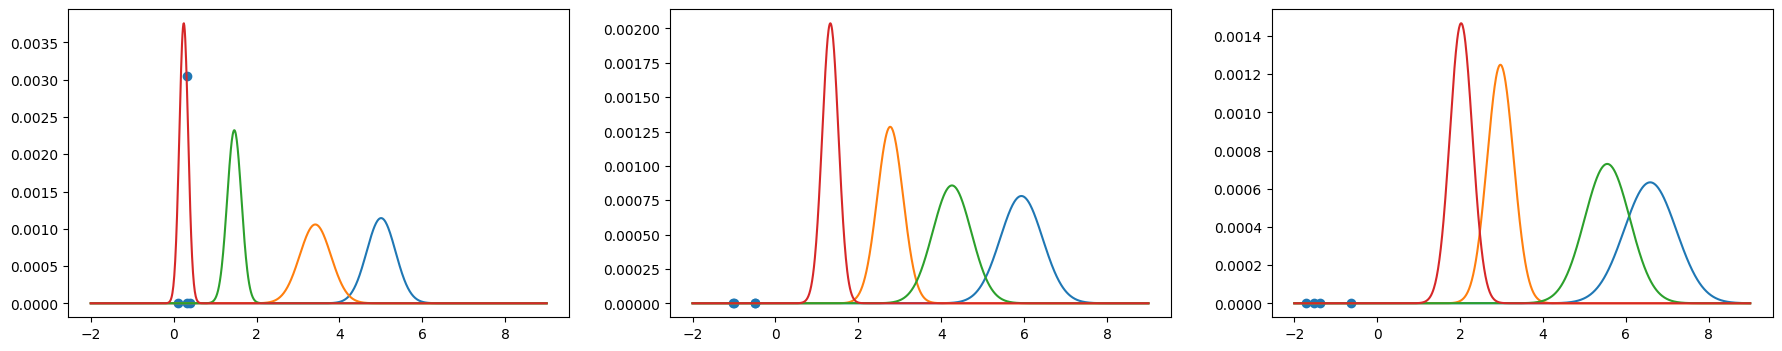

In [1435]:
CLASS = 0
fig, axes = plt.subplots(1, 3, figsize=(22, 4))
groups = list(y.groupby('class').groups.values())
for _ in range(len(axes)):
    features = X.iloc[groups[_]]
    a, c = 5, 1000
    arr = np.linspace(-a + 3, a + 4, c)
    arrr = np.vstack([arr, arr, arr, arr]).transpose()
    func =  prob_dist(feature=features, thr=1e-3)
    axes[_].plot(arr, func(arrr))
    test = np.random.random( ) * np.random.randint(-2, 4)
    axes[_].scatter(test, prob_dist(feature=features, thr=1e-3)(np.array(test)))
    
plt.show()

In [1242]:
class NaiveBayes:
    def __init__(self):
        pass
    
    def _prob_class_conditional(self):
        pass
    
    def _prob_total(self):
        pass
    
    def _prob_class(self):
        pass
    
    def decision_rule(self, X, class_prob):
        pass
    
    def fit(self, x: pd.DataFrame, y: pd.DataFrame):
        if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.DataFrame):
            raise TypeError(f'X is type {type(x)} must be {pd.DataFrame}, y is type {type(y)} must be {pd.DataFrame}')
        
        # Compute the prior for the class probabilities 
        class_probabilities = y.value_counts()/len(y) 
        
        # Extract the classes
        classes = list(chain(*class_probabilities.index))
        
        # Extract indices
        groups = list(y.groupby(list(y.columns)).groups.values())
    
        
nb = NaiveBayes()
nb.fit(x=X, y=y)

[2.23636801e-27 1.34760340e-26 7.37282748e-28 9.39764830e-27
 7.06560874e-28 9.14974366e-25 9.42647725e-27 1.18434768e-26
 1.39371423e-27 1.70644658e-27 3.18275696e-27 1.87091960e-26
 4.13931147e-28 4.52914743e-31 3.25117703e-30 9.37091850e-29
 5.62190523e-27 3.70171943e-26 3.43672131e-25 8.64358229e-27
 4.24670547e-25 3.05802951e-25 4.38258340e-31 7.34705064e-22
 6.02819111e-25 2.50694011e-25 8.72419259e-24 1.10410903e-26
 6.14190483e-27 3.60064712e-26 8.44636060e-26 7.70592613e-24
 8.25223533e-31 2.26196957e-30 1.70644658e-27 6.39644122e-28
 1.54516322e-27 1.70644658e-27 3.00599185e-28 1.66213153e-26
 6.89022713e-27 3.81266278e-27 1.50169182e-28 3.18882687e-22
 1.23939992e-23 1.47221143e-25 1.82255546e-27 1.72543957e-27
 2.54399498e-27 5.93976744e-27 7.99247681e-12 4.61000573e-11
 7.67329977e-12 6.14837919e-11 8.74248367e-11 2.45015956e-10
 1.32357059e-11 6.24244738e-13 9.32828892e-11 7.67751155e-11
 1.92807350e-13 1.58922804e-10 1.29967958e-11 1.61460966e-10
 8.57718754e-11 5.129938